In [2]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path
import torch.nn.functional as F

In [3]:
path_folder = 'TOP4040/'

In [4]:
class NPZLoader(Dataset):
    def __init__(self, path, transform=None, cur_iter = 7):
        self.path = path
        self.files = list(Path(path).glob('**/*.npz'))
        self.transform = transform
        self.cur_iter = cur_iter

    def __len__(self):
        return len(self.files)

    def __getitem__(self, item):
        numpy_array = np.load(self.files[item])['arr_0']
        target = numpy_array[-1]
        r,c = numpy_array[0].shape
        n_1_iter = numpy_array[self.cur_iter]
        n_iter = numpy_array[self.cur_iter-1]
        gradient = (n_1_iter - n_iter).reshape(1,r,c)
        sample = np.concatenate((n_1_iter.reshape(1,r,c),gradient)), target
        
        
        if self.transform:
            sample = self.transform(sample)
        return sample

In [5]:
class ToTensor:
    def __call__(self, sample):
        
        image, target = sample
        
        return torch.from_numpy(image.astype(np.float32)), torch.from_numpy(target.astype(np.float32))
        

In [6]:
check = NPZLoader(path_folder,cur_iter = 4, transform = ToTensor())

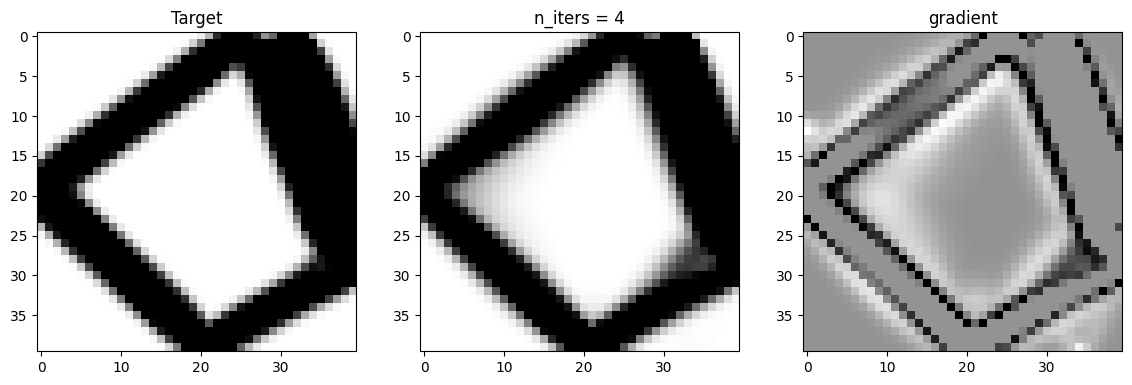

In [7]:
num = 8
plt.figure(figsize = (14,11))
plt.subplot(1,3,1)
plt.title(f'Target')
plt.imshow(check[num][1].numpy(), cmap= 'binary')

plt.subplot(1,3,2)
plt.title(f'n_iters = {check.cur_iter}')
plt.imshow(check[num][0][0].numpy(), cmap= 'binary')

plt.subplot(1,3,3)
plt.title(f'gradient')
plt.imshow(check[num][0][1].numpy(), cmap= 'binary')

In [8]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1 = nn.Conv2d(2, 18, 3) 
        self.pool = nn.MaxPool2d(2,2) 
        self.conv2 = nn.Conv2d(18, 50, 3, padding = 1) 
        self.conv3 = nn.Conv2d(50, 82, 3, padding = 1)
        self.drop = nn.Dropout()
        self.conv4 = nn.Conv2d(82,82+64, 3, padding=1)
        
        
    def forward(self,x): 
        
        ...

In [9]:
image_check = check[0][0]

In [10]:
image_check[0].shape

torch.Size([40, 40])

In [23]:
conv1 = nn.Conv2d(2, 18, 3, padding = 1)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(18, 50, 3,padding = 1)
conv3 = nn.Conv2d(50, 82, 3, padding = 1)
conv4 = nn.Conv2d(82,82+64, 3, padding=1)
upsample = nn.Upsample(size = 40, mode = 'nearest')
print(image_check.shape)
drop = nn.Dropout()
x = conv1(image_check)
print(f'conv1 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv2(x)
print(f'conv2 - {x.shape}')
x = drop(x)
print(f'drop - {x.shape}')
x = conv3(x)
print(f'conv4 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv4(x)
print(f'conv4 - {x.shape}')
x = upsample(x)
print(f'upsample - {x.shape}')

torch.Size([2, 40, 40])
conv1 - torch.Size([18, 40, 40])
pool - torch.Size([18, 20, 20])
conv2 - torch.Size([50, 20, 20])
drop - torch.Size([50, 20, 20])
conv4 - torch.Size([82, 20, 20])
pool - torch.Size([82, 10, 10])
conv4 - torch.Size([146, 10, 10])
upsample - torch.Size([146, 10, 40])


In [12]:
a = torch.arange(27, dtype=torch.float32).view(3,3,3)
a, a.shape

(tensor([[[ 0.,  1.,  2.],
          [ 3.,  4.,  5.],
          [ 6.,  7.,  8.]],
 
         [[ 9., 10., 11.],
          [12., 13., 14.],
          [15., 16., 17.]],
 
         [[18., 19., 20.],
          [21., 22., 23.],
          [24., 25., 26.]]]),
 torch.Size([3, 3, 3]))

In [13]:
b = torch.arange(16, dtype = torch.float32).view(1,4,4)
b, b.shape

(tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]),
 torch.Size([1, 4, 4]))

In [14]:
m = nn.Upsample( size = 16,mode='linear')

In [15]:
m(b), m(b).shape

(tensor([[[ 0.0000,  0.0000,  0.1250,  0.3750,  0.6250,  0.8750,  1.1250,
            1.3750,  1.6250,  1.8750,  2.1250,  2.3750,  2.6250,  2.8750,
            3.0000,  3.0000],
          [ 4.0000,  4.0000,  4.1250,  4.3750,  4.6250,  4.8750,  5.1250,
            5.3750,  5.6250,  5.8750,  6.1250,  6.3750,  6.6250,  6.8750,
            7.0000,  7.0000],
          [ 8.0000,  8.0000,  8.1250,  8.3750,  8.6250,  8.8750,  9.1250,
            9.3750,  9.6250,  9.8750, 10.1250, 10.3750, 10.6250, 10.8750,
           11.0000, 11.0000],
          [12.0000, 12.0000, 12.1250, 12.3750, 12.6250, 12.8750, 13.1250,
           13.3750, 13.6250, 13.8750, 14.1250, 14.3750, 14.6250, 14.8750,
           15.0000, 15.0000]]]),
 torch.Size([1, 4, 16]))

In [16]:
m(b).view(1,8,8)

tensor([[[ 0.0000,  0.0000,  0.1250,  0.3750,  0.6250,  0.8750,  1.1250,
           1.3750],
         [ 1.6250,  1.8750,  2.1250,  2.3750,  2.6250,  2.8750,  3.0000,
           3.0000],
         [ 4.0000,  4.0000,  4.1250,  4.3750,  4.6250,  4.8750,  5.1250,
           5.3750],
         [ 5.6250,  5.8750,  6.1250,  6.3750,  6.6250,  6.8750,  7.0000,
           7.0000],
         [ 8.0000,  8.0000,  8.1250,  8.3750,  8.6250,  8.8750,  9.1250,
           9.3750],
         [ 9.6250,  9.8750, 10.1250, 10.3750, 10.6250, 10.8750, 11.0000,
          11.0000],
         [12.0000, 12.0000, 12.1250, 12.3750, 12.6250, 12.8750, 13.1250,
          13.3750],
         [13.6250, 13.8750, 14.1250, 14.3750, 14.6250, 14.8750, 15.0000,
          15.0000]]])